Code to show a usecase of PPO on a Pendulum environment

In [2]:
import os
import sys
sys.path.insert(1, '/Users/keithwang/Desktop/Fall 2023/Reinforcement Learning/final project (final version)/RLevator/')
from RLevator.rlevator.environment import RLevatorEnv
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.monitor import Monitor

In [3]:
env = RLevatorEnv(num_elevators=3, num_floors=6)
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.shape)
print("Action Space Sample", env.action_space.sample()) # Take a random action
#print("Action Space High", env.action_space.high) # Get the highest action value
#print("Action Space Low", env.action_space.low) # G#et the lowest action value
print("\n ################################################################# \n")
env2 = RLevatorEnv(num_elevators=3, num_floors=6)
env2.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env2.observation_space.shape)
print("Sample observation", env2.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env2.action_space.shape)
print("Action Space Sample", env2.action_space.sample()) # Take a random action

_____OBSERVATION SPACE_____ 

Observation Space Shape (48,)
Sample observation [1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1]

 _____ACTION SPACE_____ 

Action Space Shape (3,)
Action Space Sample [3 0 0]

 ################################################################# 

_____OBSERVATION SPACE_____ 

Observation Space Shape (48,)
Sample observation [1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1]

 _____ACTION SPACE_____ 

Action Space Shape (3,)
Action Space Sample [5 0 2]


## Create the Model
- We are using an existing Deep RL library to set up the [PPO algorithm](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D) and model, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

In [4]:
# Wrap the environment
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

a2c_model = A2C(
    policy = 'MlpPolicy',
    env = env,
    learning_rate=3e-4,
    n_steps = 1024,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    seed=42)




Using cpu device
Wrapping the env in a DummyVecEnv.


In [5]:
a2c_model.learn(total_timesteps=5e6, log_interval=500, progress_bar=True)

Output()

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -3.58e+04 |
| time/                 |           |
|    fps                | 2167      |
|    iterations         | 500       |
|    time_elapsed       | 236       |
|    total_timesteps    | 512000    |
| train/                |           |
|    entropy_loss       | -5.33     |
|    explained_variance | 9.13e-05  |
|    learning_rate      | 0.0003    |
|    n_updates          | 499       |
|    policy_loss        | -6.95e+03 |
|    value_loss         | 1.95e+06  |
-------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -2.61e+04 |
| time/                 |           |
|    fps                | 2182      |
|    iterations         | 1000      |
|    time_elapsed       | 469       |
|    total_timesteps    | 1024000   |
| train/                |           |
|    entropy_loss       | -5.11     |
|    explained_variance | 3.7e-06   |
|    learning_rate      | 0.0003    |
|    n_updates          | 999       |
|    policy_loss        | -5.33e+03 |
|    value_loss         | 1.21e+06  |
-------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -1.61e+04 |
| time/                 |           |
|    fps                | 2185      |
|    iterations         | 1500      |
|    time_elapsed       | 702       |
|    total_timesteps    | 1536000   |
| train/                |           |
|    entropy_loss       | -4.95     |
|    explained_variance | 2.21e-06  |
|    learning_rate      | 0.0003    |
|    n_updates          | 1499      |
|    policy_loss        | -3e+03    |
|    value_loss         | 4.51e+05  |
-------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -7.99e+03 |
| time/                 |           |
|    fps                | 2194      |
|    iterations         | 2000      |
|    time_elapsed       | 933       |
|    total_timesteps    | 2048000   |
| train/                |           |
|    entropy_loss       | -4.73     |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0003    |
|    n_updates          | 1999      |
|    policy_loss        | -2.2e+03  |
|    value_loss         | 3.12e+05  |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | -381     |
| time/                 |          |
|    fps                | 2201     |
|    iterations         | 2500     |
|    time_elapsed       | 1162     |
|    total_timesteps    | 2560000  |
| train/                |          |
|    entropy_loss       | -4.55    |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0003   |
|    n_updates          | 2499     |
|    policy_loss        | 554      |
|    value_loss         | 1.04e+05 |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | 3.78e+03  |
| time/                 |           |
|    fps                | 2199      |
|    iterations         | 3000      |
|    time_elapsed       | 1396      |
|    total_timesteps    | 3072000   |
| train/                |           |
|    entropy_loss       | -4.35     |
|    explained_variance | -1.43e-06 |
|    learning_rate      | 0.0003    |
|    n_updates          | 2999      |
|    policy_loss        | 942       |
|    value_loss         | 1.15e+05  |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | 6.22e+03 |
| time/                 |          |
|    fps                | 2203     |
|    iterations         | 3500     |
|    time_elapsed       | 1626     |
|    total_timesteps    | 3584000  |
| train/                |          |
|    entropy_loss       | -4.33    |
|    explained_variance | -0.00046 |
|    learning_rate      | 0.0003   |
|    n_updates          | 3499     |
|    policy_loss        | 637      |
|    value_loss         | 1.16e+05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | 8.75e+03 |
| time/                 |          |
|    fps                | 2204     |
|    iterations         | 4000     |
|    time_elapsed       | 1858     |
|    total_timesteps    | 4096000  |
| train/                |          |
|    entropy_loss       | -4.12    |
|    explained_variance | 0.000395 |
|    learning_rate      | 0.0003   |
|    n_updates          | 3999     |
|    policy_loss        | 1.36e+03 |
|    value_loss         | 1.76e+05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | 9.94e+03 |
| time/                 |          |
|    fps                | 2201     |
|    iterations         | 4500     |
|    time_elapsed       | 2093     |
|    total_timesteps    | 4608000  |
| train/                |          |
|    entropy_loss       | -4.02    |
|    explained_variance | 2.35e-05 |
|    learning_rate      | 0.0003   |
|    n_updates          | 4499     |
|    policy_loss        | 2.03e+03 |
|    value_loss         | 3.22e+05 |
------------------------------------


In [6]:
env2 = Monitor(env2, log_dir)

ppo_model = PPO(
    policy = 'MlpPolicy',
    env = env2,
    learning_rate=3e-4,
    n_steps = 1024,
    batch_size = 256,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    seed=42)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [7]:
ppo_model.learn(total_timesteps=5e6, log_interval=500, progress_bar=True)

Output()

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -3.71e+04    |
| time/                   |              |
|    fps                  | 1951         |
|    iterations           | 500          |
|    time_elapsed         | 262          |
|    total_timesteps      | 512000       |
| train/                  |              |
|    approx_kl            | 2.379762e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.33        |
|    explained_variance   | 5.36e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.5e+06      |
|    n_updates            | 1996         |
|    policy_gradient_loss | -0.000179    |
|    value_loss           | 2.87e+06     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -2.69e+04    |
| time/                   |              |
|    fps                  | 1977         |
|    iterations           | 1000         |
|    time_elapsed         | 517          |
|    total_timesteps      | 1024000      |
| train/                  |              |
|    approx_kl            | 4.477275e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.2         |
|    explained_variance   | -2.38e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 8.55e+05     |
|    n_updates            | 3996         |
|    policy_gradient_loss | -0.000198    |
|    value_loss           | 1.75e+06     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1e+03         |
|    ep_rew_mean          | -1.8e+04      |
| time/                   |               |
|    fps                  | 1990          |
|    iterations           | 1500          |
|    time_elapsed         | 771           |
|    total_timesteps      | 1536000       |
| train/                  |               |
|    approx_kl            | 1.8180173e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -5.04         |
|    explained_variance   | 1.79e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 2.4e+05       |
|    n_updates            | 5996          |
|    policy_gradient_loss | -0.000494     |
|    value_loss           | 4.72e+05      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -1e+04       |
| time/                   |              |
|    fps                  | 2006         |
|    iterations           | 2000         |
|    time_elapsed         | 1020         |
|    total_timesteps      | 2048000      |
| train/                  |              |
|    approx_kl            | 3.472611e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.89        |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.15e+05     |
|    n_updates            | 7996         |
|    policy_gradient_loss | -0.000788    |
|    value_loss           | 2.16e+05     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -53.1        |
| time/                   |              |
|    fps                  | 2017         |
|    iterations           | 2500         |
|    time_elapsed         | 1268         |
|    total_timesteps      | 2560000      |
| train/                  |              |
|    approx_kl            | 5.752023e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.54        |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 7.89e+04     |
|    n_updates            | 9996         |
|    policy_gradient_loss | -0.000283    |
|    value_loss           | 1.54e+05     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1e+03         |
|    ep_rew_mean          | 5.13e+03      |
| time/                   |               |
|    fps                  | 2018          |
|    iterations           | 3000          |
|    time_elapsed         | 1521          |
|    total_timesteps      | 3072000       |
| train/                  |               |
|    approx_kl            | 5.1670126e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.29         |
|    explained_variance   | 6.14e-06      |
|    learning_rate        | 0.0003        |
|    loss                 | 5.72e+04      |
|    n_updates            | 11996         |
|    policy_gradient_loss | -0.00064      |
|    value_loss           | 1.13e+05      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | 7.44e+03     |
| time/                   |              |
|    fps                  | 2023         |
|    iterations           | 3500         |
|    time_elapsed         | 1771         |
|    total_timesteps      | 3584000      |
| train/                  |              |
|    approx_kl            | 8.301751e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.13        |
|    explained_variance   | -4.77e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 9.15e+04     |
|    n_updates            | 13996        |
|    policy_gradient_loss | -0.000359    |
|    value_loss           | 1.86e+05     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1e+03         |
|    ep_rew_mean          | 1.09e+04      |
| time/                   |               |
|    fps                  | 2027          |
|    iterations           | 4000          |
|    time_elapsed         | 2020          |
|    total_timesteps      | 4096000       |
| train/                  |               |
|    approx_kl            | 0.00012071355 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.11         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.39e+05      |
|    n_updates            | 15996         |
|    policy_gradient_loss | -0.00142      |
|    value_loss           | 2.86e+05      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1e+03         |
|    ep_rew_mean          | 1.22e+04      |
| time/                   |               |
|    fps                  | 2035          |
|    iterations           | 4500          |
|    time_elapsed         | 2263          |
|    total_timesteps      | 4608000       |
| train/                  |               |
|    approx_kl            | 6.4542226e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.08         |
|    explained_variance   | 1.19e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 1.18e+05      |
|    n_updates            | 17996         |
|    policy_gradient_loss | -0.000759     |
|    value_loss           | 2.36e+05      |
-------------------------------------------


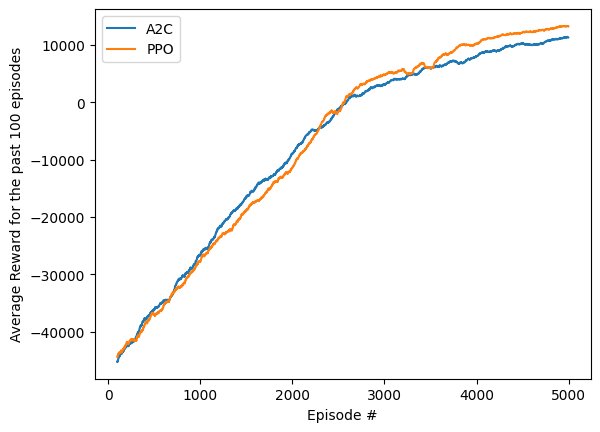

In [8]:
episode_rew_a2c = env.get_episode_rewards()
episode_rew_ppo = env2.get_episode_rewards()
episode_rew_a2c_ma = (np.convolve(episode_rew_a2c, np.ones(100), "valid") / 100)
episode_rew_ppo_ma = (np.convolve(episode_rew_ppo, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_rew_a2c)+1), episode_rew_a2c_ma, label="A2C")
plt.plot(np.arange(100, len(episode_rew_ppo)+1), episode_rew_ppo_ma, label="PPO")
plt.ylabel('Average Reward for the past 100 episodes')
plt.xlabel('Episode #')
plt.legend()
plt.savefig('a2c&ppo-8e6.png')